In [ ]:
%pip install pandas
%pip install scikit-learn
%pip install matplotlib

In [2]:
from sklearn import datasets 
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split, GridSearchCV

There are 569 instances described by 30 features.
The accuracy of the classifier is 0.9078947368421053


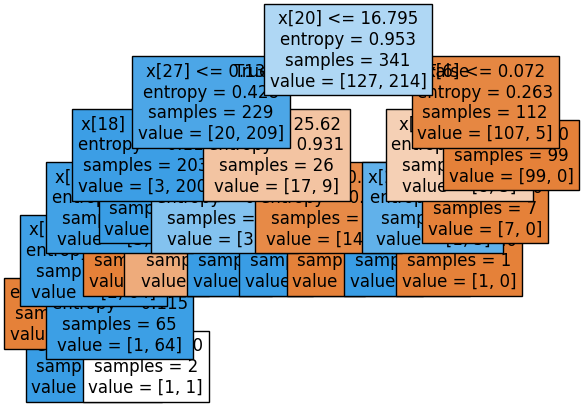

In [3]:
X, y = datasets.load_breast_cancer(return_X_y=True) #(4 points) 

# Check how many instances we have in the dataset, and how many features describe these instances
print("There are", X.shape[0], "instances described by", X.shape[1], "features.") #(4 points)  

# Create a training and test set such that the test set has 40% of the instances from the 
# complete breast cancer wisconsin dataset and that the training set has the remaining 60% of  
# the instances from the complete breast cancer wisconsin dataset, using the holdout method. 
# In addition, ensure that the training and test sets # contain approximately the same 
# percentage of instances of each target class as the complete set.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, stratify=y, random_state = 42)  #(4 points) 

# Create a decision tree classifier. Then Train the classifier using the training dataset created earlier.
# To measure the quality of a split, using the entropy criteria.
# Ensure that nodes with less than 6 training instances are not further split
clf = tree.DecisionTreeClassifier(criterion="entropy", min_samples_split=6)  #(4 points) 
clf = clf.fit(X_train, y_train)  #(4 points) 

# Apply the decision tree to classify the data 'testData'.
predC = clf.predict(X_test)  #(4 points) 

# Compute the accuracy of the classifier on 'testData'
print('The accuracy of the classifier is', accuracy_score(y_test, predC))  #(2 point) 

# Visualize the tree created. Set the font size the 12 (4 points) 
_ = tree.plot_tree(clf, filled=True, fontsize= 12)  


' \nAccording to the test error, the best model to select is when the maximum depth is equal to 3, approximately. \nBut, we should not use select the hyperparameters of our model using the test data, because it can lead to overfitting as the model may not generalize well to unseen data.\n'

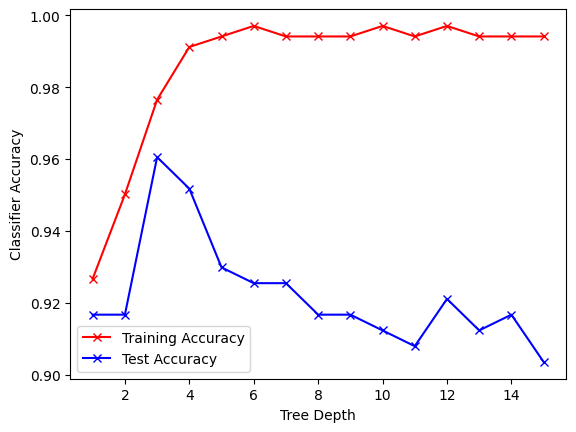

In [4]:
### PART 2.1 ###
# Visualize the training and test error as a function of the maximum depth of the decision tree
# Initialize 2 empty lists where you will save the training and testing accuracies 
# as we iterate through the different decision tree depth options.
trainAccuracy = []  #(1 point) 
testAccuracy = [] #(1 point) 
# Use the range function to create different depths options, ranging from 1 to 15, for the decision trees
depthOptions = range(1, 16) #(1 point) 
for depth in depthOptions: #(1 point) 
    # Use a decision tree classifier that still measures the quality of a split using the entropy criteria.
    # Also, ensure that nodes with less than 6 training instances are not further split
    cltree = tree.DecisionTreeClassifier(criterion="entropy",max_depth=depth, min_samples_split=6) #(1 point) 
    # Decision tree training
    cltree = cltree.fit(X_train, y_train) #(1 point) 
    # Training error
    y_predTrain = cltree.predict(X_train) #(1 point) 
    # Testing error
    y_predTest = cltree.predict(X_test) #(1 point) 
    # Training accuracy
    trainAccuracy.append(accuracy_score(y_train, y_predTrain)) #(1 point) 
    # Testing accuracy
    testAccuracy.append(accuracy_score(y_test, y_predTest)) #(1 point) 

# Plot of training and test accuracies vs the tree depths (use different markers of different colors)
plt.plot(depthOptions, trainAccuracy, marker='x', color='r', label='Training Accuracy')
plt.plot(depthOptions, testAccuracy, marker='x', color='b', label='Test Accuracy') #(3 points) 
plt.legend(['Training Accuracy','Test Accuracy']) # add a legend for the training accuracy and test accuracy (1 point) 
plt.xlabel('Tree Depth') # name the horizontal axis 'Tree Depth' (1 point) 
plt.ylabel('Classifier Accuracy') # name the horizontal axis 'Classifier Accuracy' (1 point) 

# Fill out the following blanks: #(4 points (2 points per blank)) 
""" 
According to the test error, the best model to select is when the maximum depth is equal to 3, approximately. 
But, we should not use select the hyperparameters of our model using the test data, because it can lead to overfitting as the model may not generalize well to unseen data.
"""


c:\Users\nnuai\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
95 fits failed out of a total of 855.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
95 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\nnuai\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\nnuai\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "c:\Users\nnuai\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.p

The maximum depth of the tree sis 6 and the minimum number of samples required to split a node is 3


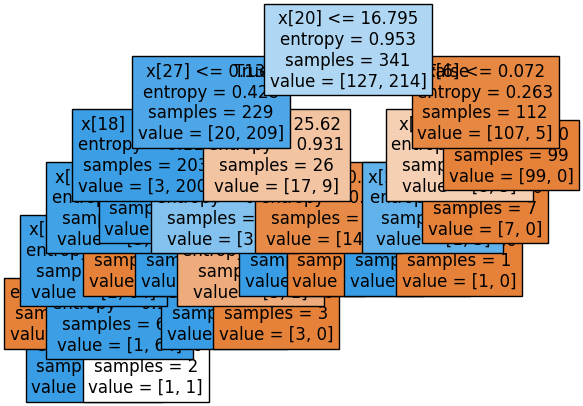

In [5]:
### PART 2.2 ###
# Use sklearn's GridSearchCV function to perform an exhaustive search to find the best tree depth and the minimum number of samples to split a node
# Hint: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
# Define the parameters to be optimized: the max depth of the tree and the minimum number of samples to split a node
parameters = {'max_depth':range(1, 20), 'min_samples_split':range(1,10)} #(6 points)
# We will still grow a decision tree classifier by measuring the quality of a split using the entropy criteria. 
clf = GridSearchCV(tree.DecisionTreeClassifier(criterion='entropy'), parameters, cv = 5) #(6 points)
clf.fit(X_train, y_train) #(4 points)
tree_model = clf.best_estimator_ #(4 points)
print("The maximum depth of the tree sis", tree_model.get_depth(), 
      'and the minimum number of samples required to split a node is', tree_model.get_params()['min_samples_split']) #(6 points)

# The best model is tree_model. Visualize that decision tree (tree_model). Set the font size the 12 
_ = tree.plot_tree(tree_model,filled=True, fontsize=12) #(4 points)
